## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io
import itertools as it
import scipy.special as psi
plt.style.use('classic')
import seaborn as sns
import pandas as pd
import math as mt
import time
import sys

sys.path.insert(1, '/rds/general/user/lr4617/home/4th_Year_Project/Final_Year_Project/')

from scipy.io import loadmat
from scipy import stats
from numpy.random import seed
from numpy.random import rand
from scipy.integrate import quad
from scipy.io import savemat
from tempfile import TemporaryFile
from scipy.io import loadmat
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.decomposition import KernelPCA
from mpl_toolkits import mplot3d
from mPE_fn import mPE_
from scipy.spatial import distance
from scipy.stats import entropy
from mPE_ultis import integrand, ubble, array_list, permutation

## AUTOMI vs Time Lag

In [3]:
# load AUTOMI vs Time Lag
modes = ['normal', 'drug']
root_dir = '/rds/general/user/lr4617/home/4th_Year_Project/CAPTURE_rat_multidimensional/raw_data/'
cnt = 0

for mode in modes:
    print(mode)
    trajs = os.listdir(root_dir + mode + '/' )
    for traj_n in trajs:
        print(traj_n)
        if traj_n != '.ipynb_checkpoints': 
            # loading entire high-dimensional trajectory
            path = root_dir + mode + '/' + traj_n + '/' + 'sub_sampling_analysis/'
            autoMI = np.load(path + 'na_auto_MI_per_lag_6.npy')
            autoMI = np.reshape(autoMI, (1, np.max(autoMI.shape)))
            
            # append trajectory to all trajectories
            if cnt==0:
                rats_autoMI = autoMI
            if cnt>0:
                rats_autoMI = np.concatenate((rats_autoMI, autoMI), axis=0)
            
            cnt += 1
            

normal
traj_5
traj_3
.ipynb_checkpoints
traj_4
traj_1
drug
traj_5
traj_8
traj_3
traj_4
traj_7
traj_2
traj_6
traj_1


(-1.0, 300.0)

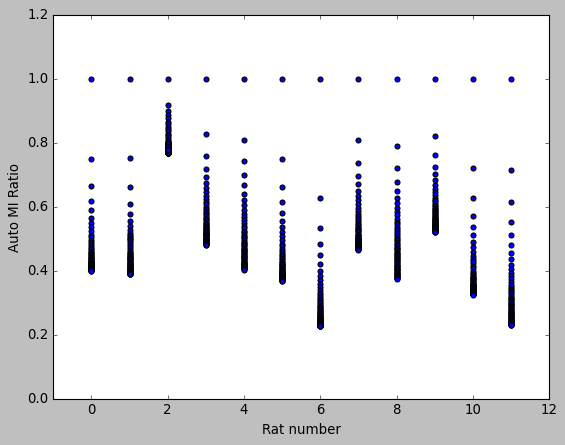

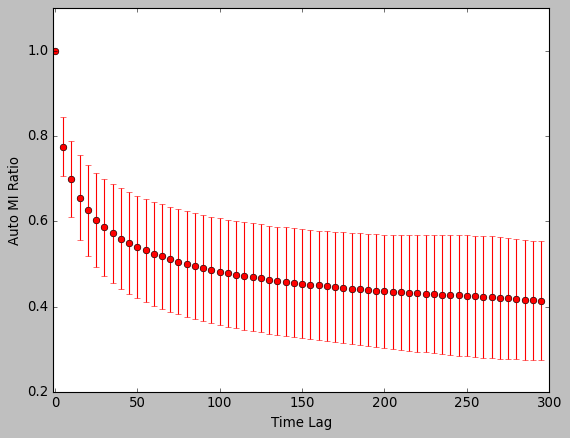

In [9]:
# normalize each AUTOMI vs Time Lag independently
for i in range(rats_autoMI.shape[0]):
    rats_autoMI[i, :] = rats_autoMI[i, :]/(np.max(rats_autoMI[i, :]))
    
plt.figure()    
for lag_idx in range(rats_autoMI.shape[1]):
    plt.scatter(np.arange(rats_autoMI.shape[0]), rats_autoMI[:, lag_idx])
    plt.ylabel('Auto MI Ratio')
    plt.xlabel('Rat number')
    plt.xlim([-1, rats_autoMI.shape[0]])
    
mean_autoMI = np.mean(rats_autoMI, axis=0)
var_autoMI = np.var(rats_autoMI, axis=0)
plt.figure()    
plt.scatter(5*np.arange(rats_autoMI.shape[1]), mean_autoMI)
plt.errorbar(5*np.arange(rats_autoMI.shape[1]), mean_autoMI, np.sqrt(var_autoMI), fmt="o", color="r")
plt.ylabel('Auto MI Ratio')
plt.xlabel('Time Lag')
plt.xlim([-1, 5*rats_autoMI.shape[1]])

